# Preprocess Data with excel
Raw data인 "1. 학생정식 식수인원(복지회).xlsx"의 정보를 엑셀을 이용해 "2021-07-01"같은 날짜 데이터를 년/월/일 칼럼으로 분리했고, 그 결과를 head_count.xlsx의 2021 과 2020 sheet에 저장해둠 

# Preprocess Data with Pandas
기존 데이터를 "Year", "Month", "Day", "Hour","Minute","HeadCount"의 칼럼 구성을 갖는 데이터로 변환함

In [8]:
import pandas as pd
df = pd.read_excel("./data/head_count.xlsx", engine = "openpyxl", sheet_name="2021")
new_df = pd.DataFrame(columns=["Year", "Month", "Day", "Hour","Minute","HeadCount"])
for i in range(len(df)):
    new_df.loc[i*3] = [df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],7,30,df.loc[i]["breakfast"]]
    new_df.loc[i*3+1] = [df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],11,30,df.loc[i]["lunch"]]
    new_df.loc[i*3+2] = [df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],17,30,df.loc[i]["dinner"]]
new_df.to_csv("./data/bbb.csv", mode="w")
new_df.head()

,Year,Month,Day,Hour,Minute,HeadCount
0,2021.0,1.0,1.0,7.0,30.0,22.0
1,2021.0,1.0,1.0,11.0,30.0,101.0
2,2021.0,1.0,1.0,17.0,30.0,55.0
3,2021.0,1.0,2.0,7.0,30.0,29.0
4,2021.0,1.0,2.0,11.0,30.0,98.0


2020, 2021 년도를 각각 처리해서, excel상에서 이를 stack해 total sheet를 head_count.xlsx에 생성함.

In [11]:
hc_df = pd.read_excel("./data/head_count.xlsx", engine = "openpyxl", sheet_name="total")
hc_df.head()

,Year,Month,Day,Hour,Minute,HeadCount
0,2020,1,1,7,30,37.0
1,2020,1,1,11,30,127.0
2,2020,1,1,17,30,103.0
3,2020,1,2,7,30,60.0
4,2020,1,2,11,30,317.0


위에서 정리한 head_count 정보를 기존에 있던 메뉴 정보와 결합함

In [12]:
menu_df = pd.read_excel("./data/menu.xlsx", engine = "openpyxl")
total_df = pd.merge(hc_df,menu_df,on=["Year", "Month", "Day", "Hour","Minute"])
total_df.head()
#total_df.to_csv("./data/complete.csv", mode="w")

,Year,Month,Day,Hour,Minute,HeadCount,Kcal,Protein,M1,M2,M3,M4,M5
0,2020,1,1,7,30,37.0,944,51,탕국,돈육죽순볶음,어묵야채볶음,물다시마채무침,포장김
1,2020,1,1,7,30,37.0,746,16,감자샌드위치/우유,NaN,NaN,NaN,NaN
2,2020,1,1,11,30,127.0,1205,45,떡국,돼지갈비찜,애호박가지찜,취나물볶음,NaN
3,2020,1,1,17,30,103.0,1004,37,들깨버섯국,순대깻잎볶음,브베계란볶음,꽈리연근조림,NaN
4,2020,1,2,7,30,60.0,1260,62,유부무국,시래기고등어조림,계란찜,도라지진미채무침,키위


이후, excel 기능을 활용해 Data칼럼(년,월,일로 구성된 timestamp)과 Week(요일)칼럼을 추가해 completion.xlsx을 제작함

위에서 생성한 dataframe을 이용해 pandas profiling 진행

In [26]:
import pandas_profiling
df = pd.read_excel("./data/completion.xlsx", engine = "openpyxl")
report = df.profile_report()
report.to_file('./static_EDA.html')

# EDA

## Load complete dataframe

In [13]:
df = pd.read_excel("./data/completion.xlsx", engine = "openpyxl")

## Simple EDA Result

In [24]:
df.groupby('Week')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index().sort_values(by=['mean_count'], 
                                                                                     axis=0,
                                                                                     ascending=False)

,Week,mean_count,min_count,max_count
3,월,198.911765,16.0,516.0
6,화,192.411765,20.0,496.0
1,목,191.510870,17.0,560.0
2,수,180.796364,26.0,471.0
0,금,155.341912,16.0,443.0
4,일,100.661765,5.0,324.0
5,토,90.569853,6.0,296.0


In [18]:
df.groupby('Hour')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index().sort_values(by=['mean_count'], 
                                                                                     axis=0,
                                                                                     ascending=False)

,Hour,mean_count,min_count,max_count
1,11,247.663180,31.0,560.0
2,17,217.046122,28.0,516.0
0,7,85.115063,5.0,193.0


In [19]:
df.groupby('Year')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index().sort_values(by=['mean_count'], 
                                                                                     axis=0,
                                                                                     ascending=False)

,Year,mean_count,min_count,max_count
1,2021,171.563485,6.0,560.0
0,2020,142.027644,5.0,443.0


In [20]:
df.groupby('Month')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index().sort_values(by=['mean_count'], 
                                                                                     axis=0,
                                                                                     ascending=False)

,Month,mean_count,min_count,max_count
4,5,194.670732,44.0,530.0
5,6,187.823129,37.0,468.0
3,4,177.495833,35.0,560.0
6,7,167.430000,40.0,498.0
8,9,160.745614,16.0,492.0
2,3,153.149194,18.0,502.0
7,8,144.459677,36.0,425.0
0,1,136.189815,5.0,453.0
1,2,126.313636,6.0,437.0


In [21]:
df.groupby('M1')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index().sort_values(by=['mean_count'], 
                                                                                     axis=0,
                                                                                     ascending=False)

,M1,mean_count,min_count,max_count
60,돈까스&김치볶음밥,502.000000,502.0,502.0
229,참치마요덮밥,492.000000,492.0,492.0
231,참치비빔밥,474.666667,425.0,530.0
278,홍합미역국,468.000000,468.0,468.0
216,장각삼계탕,463.250000,342.0,560.0
...,...,...,...,...
209,인기가요샌드위치,32.000000,32.0,32.0
250,토스트,27.000000,27.0,27.0
240,치킨샌드위치/주스,26.000000,26.0,26.0
136,불고기토스트/주스Bulgogi toast,16.000000,16.0,16.0


In [22]:
df.groupby('Day')['HeadCount'].agg(**{'mean_count':'mean',
                                       'min_count':'min',
                                       'max_count':'max'}).reset_index() ## 요일별 평균 식수 인원

,Day,mean_count,min_count,max_count
0,1,148.428571,18.0,468.0
1,2,163.509091,39.0,414.0
2,3,164.416667,40.0,516.0
3,4,162.140625,36.0,496.0
4,5,148.187500,36.0,438.0
5,6,184.823529,38.0,493.0
6,7,164.485294,28.0,423.0
7,8,167.117647,29.0,560.0
8,9,159.808824,30.0,427.0
9,10,157.926471,28.0,515.0


# Time Series Preprocessing

In [1]:
import pandas as pd
df = pd.read_excel("./data/head_count.xlsx", engine = "openpyxl", sheet_name="2020")
df.head()

,Year,Month,Day,breakfast,lunch,dinner
0,2020,1,1,37,127,103
1,2020,1,2,60,317,225
2,2020,1,3,82,349,183
3,2020,1,4,49,85,120
4,2020,1,5,46,146,92


In [2]:
ts_days_idx = pd.date_range(start='1/1/20', end='10/31/20', freq='D')
series_breakfast = pd.Series(range(len(ts_days_idx)), index=ts_days_idx)
series_lunch = pd.Series(range(len(ts_days_idx)), index=ts_days_idx)
series_dinner = pd.Series(range(len(ts_days_idx)), index=ts_days_idx)
for i in df.index:
    series_breakfast[i] = df["breakfast"][i]
    series_lunch[i] = df["lunch"][i]
    series_dinner[i] = df["dinner"][i]

<AxesSubplot:>

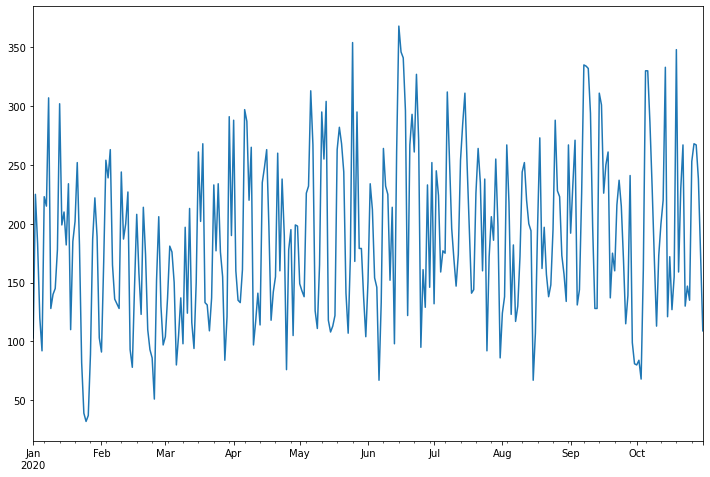

In [19]:
series_dinner.plot.line()

<AxesSubplot:>

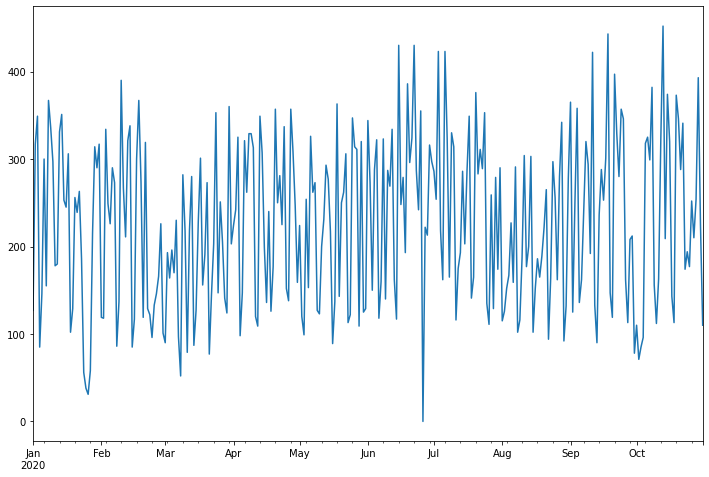

In [20]:
series_lunch.plot.line()

<AxesSubplot:>

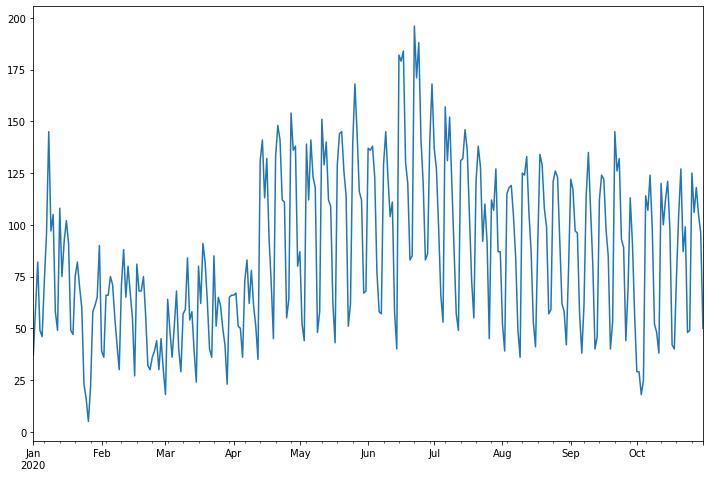

In [21]:
series_breakfast.plot.line()

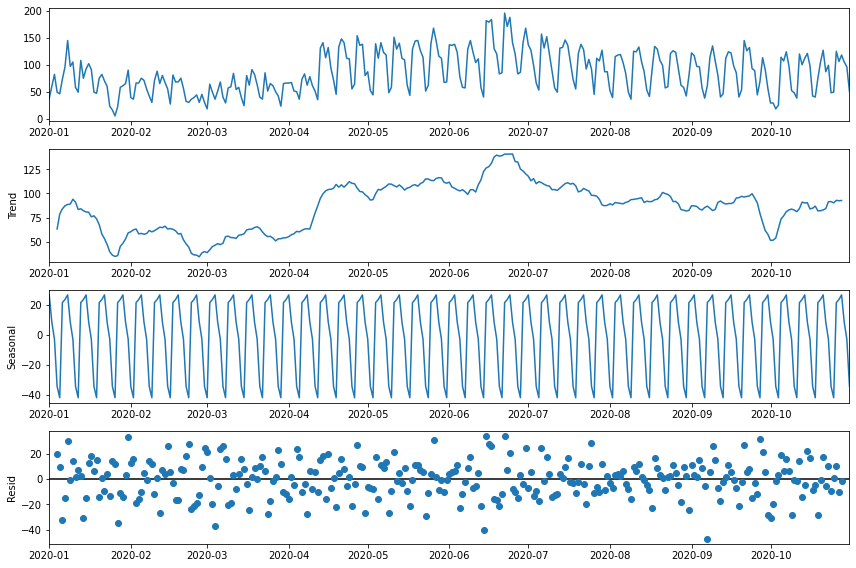

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_breakfast, model='additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()
df = pd.DataFrame({
                    "date": list(series_breakfast.index),
                    "breakfast": list(series_breakfast), 
                    "trend": list(result.trend), 
                    "seasonal": list(result.seasonal), 
                    "resid": list(result.resid)})
df.head()
df.to_csv("./data/TSL_breakfast.csv", mode="w")

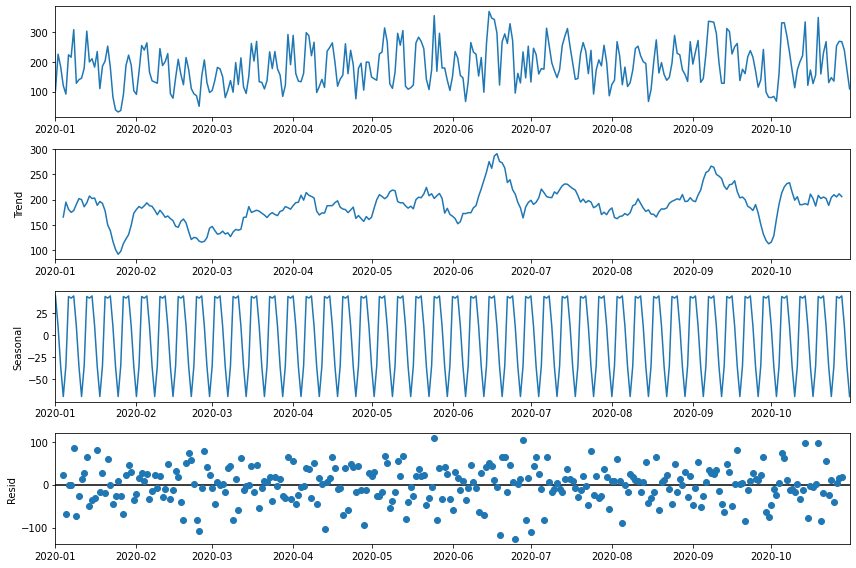

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_dinner, model='additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()
df = pd.DataFrame({
                    "date": list(series_dinner.index),
                    "dinner": list(series_dinner), 
                    "trend": list(result.trend), 
                    "seasonal": list(result.seasonal), 
                    "resid": list(result.resid)})
df.head()
df.to_csv("./data/TSL_dinner.csv", mode="w")

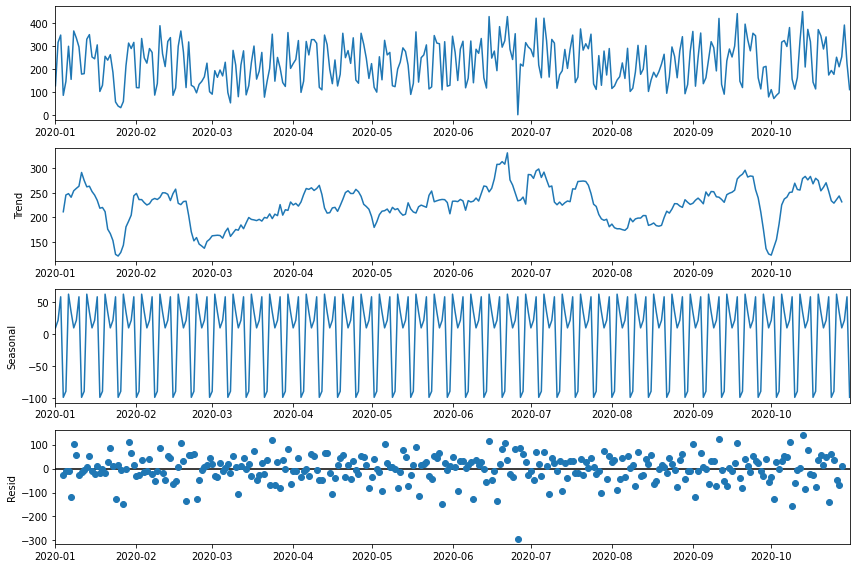

In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_lunch, model='additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()
df = pd.DataFrame({
                    "date": list(series_lunch.index),
                    "lunch": list(series_lunch), 
                    "trend": list(result.trend), 
                    "seasonal": list(result.seasonal), 
                    "resid": list(result.resid)})
df.head()
df.to_csv("./data/TSL_lunch.csv", mode="w")

# Preprocess Data with excel (2021.12.30)
Raw data인 "학생정식식수인원(2019-2021년).xlsx"의 정보를 엑셀을 이용해 "2021-07-01"같은 날짜 데이터를 년/월/일 칼럼으로 분리했고, 그 결과를 head_count_19-21.xlsx의 2019_, 2020_, 2021_ sheet에 저장해둠 

# Preprocess Data with Pandas
기존 데이터를 "Date", "Year", "Month", "Day", "Week", "Hour","Minute","HeadCount", "Oasis", "Plan"의 칼럼 구성을 갖는 데이터로 변환함. 그 결과를 head_count_19-21.xlsx의 2019, 2020, 2021 sheet에 저장해둠

- "Date": 년월일 일자 데이터
- "Year": 숫자 년도 [년]
- "Month": 숫자 월 [월]
- "Day": 숫자 일 [일]
- "Week N": 숫자 요일 1234567 = 월화수목금토일
- "Week": 텍스트 요일
- "Hour": 숫자 24시간 기준 시각 [시]
- "Minute": 숫자 분 [분]
- "HeadCount": 학생식당 식수인원 [명]
- "Oasis": 학생정식 식수인원 [명]
- "Plan": 해당 월 의무식 식수인원 [명]

In [5]:
import pandas as pd
FILE_PATH = "D:/POSTECH/교내활동/2021 스마트캠퍼스데이터경진대회/data/head_count_19-21.xlsx"
df = pd.read_excel(FILE_PATH, engine = "openpyxl", sheet_name="total")
new_df = pd.DataFrame(columns=["Date", "Year", "Month", "Day", "Week", "Week N", "Hour", "Minute", "HeadCount", "Day Sum", "Oasis", "Plan"])
for i in range(len(df)):
    new_df.loc[i*3] = [df.loc[i]["Date"],df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],df.loc[i]["Week"],df.loc[i]["Week N"],7,30,df.loc[i]["breakfast"],df.loc[i]["Day Sum"],df.loc[i]["Oasis"],df.loc[i]["Plan"]]
    new_df.loc[i*3+1] = [df.loc[i]["Date"],df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],df.loc[i]["Week"],df.loc[i]["Week N"],11,30,df.loc[i]["lunch"],df.loc[i]["Day Sum"],df.loc[i]["Oasis"],df.loc[i]["Plan"]]
    new_df.loc[i*3+2] = [df.loc[i]["Date"],df.loc[i]["Year"],df.loc[i]["Month"],df.loc[i]["Day"],df.loc[i]["Week"],df.loc[i]["Week N"],17,30,df.loc[i]["dinner"],df.loc[i]["Day Sum"],df.loc[i]["Oasis"],df.loc[i]["Plan"]]
new_df.to_csv("./aaaaa.csv", mode="w")
new_df.head()

,Date,Year,Month,Day,Week,Week N,Hour,Minute,HeadCount,Day Sum,Oasis,Plan
0,2019-01-01,2019,1,1,Tue,2,7,30,31,209,0,42
1,2019-01-01,2019,1,1,Tue,2,11,30,111,209,0,42
2,2019-01-01,2019,1,1,Tue,2,17,30,67.0,209,0,42
3,2019-01-02,2019,1,2,Wed,3,7,30,54,394,0,42
4,2019-01-02,2019,1,2,Wed,3,11,30,178,394,0,42
